In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df2=pd.read_csv('fifa_variable_information.csv')
df2.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [29]:
df1=pd.read_csv('fifa.csv')
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [30]:
df1['Value']=df1['Value'].str.replace('€','')
df1['Value']

0        110.5M
1           77M
2        118.5M
3           72M
4          102M
          ...  
18202       60K
18203       60K
18204       60K
18205       60K
18206       60K
Name: Value, Length: 18207, dtype: object

In [86]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if x=='0':
        return float(x)

In [32]:
df1['Value']=df1['Value'].apply(value_to_float)

In [33]:
df1['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [34]:
df1['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [35]:
df1['Wage']=df1['Wage'].str.replace('€','')
df1['Wage']

0        565K
1        405K
2        290K
3        260K
4        355K
         ... 
18202      1K
18203      1K
18204      1K
18205      1K
18206      1K
Name: Wage, Length: 18207, dtype: object

In [36]:
df1['Wage']=df1['Wage'].apply(value_to_float)
df1['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [39]:
pd.to_datetime(df1['Joined'])

0       2004-07-01
1       2018-07-10
2       2017-08-03
3       2011-07-01
4       2015-08-30
           ...    
18202   2017-05-03
18203   2018-03-19
18204   2017-07-01
18205   2018-04-24
18206   2018-10-30
Name: Joined, Length: 18207, dtype: datetime64[ns]

In [46]:
df1['Joined']=pd.to_datetime(df1['Joined']).dt.year
df1['Joined']

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

In [48]:
df1['Contract Valid Until']=pd.to_datetime(df1['Contract Valid Until'])
df1['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [51]:
df1['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18207, dtype: object

In [70]:
def feet_to_inches(x):
        if type(x)==str:
            b=x.split("'")
            c=float(b[0])*12 + float(b[1])
            return c
        return x

In [72]:
df1['Height']=df1['Height'].apply(feet_to_inches)
df1['Height']

0        67.0
1        74.0
2        69.0
3        76.0
4        71.0
         ... 
18202    69.0
18203    75.0
18204    68.0
18205    70.0
18206    70.0
Name: Height, Length: 18207, dtype: float64

In [82]:
df1['Weight']=df1['Weight'].str.replace('lbs','').astype(float)
df1['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [84]:
df1['Release Clause']=df1['Release Clause'].str.replace('€','')
df1['Release Clause']

0        226.5M
1        127.1M
2        228.1M
3        138.6M
4        196.4M
          ...  
18202      143K
18203      113K
18204      165K
18205      143K
18206      165K
Name: Release Clause, Length: 18207, dtype: object

In [88]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if x=='0':
        return float(x)

In [89]:
df1['Release Clause']=df1['Release Clause'].apply(value_to_float)
df1['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [94]:
df1.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Release Caluse'],
      dtype='object')

In [95]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 61 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-nu

In [96]:
df1.drop(columns=['Loaned From'],inplace=True)   #too many null values

In [100]:
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Release Caluse
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,196400000.0


In [117]:
col_name=df1.columns.values
col_name[-1]='Release Clause Duplicate'
df1.columns=col_name
df1.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Release Clause Duplicate'],
      dtype='object')

In [118]:
df1.drop(columns=['Release Clause Duplicate'],inplace=True)
df1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [134]:
df2=df1.copy()
df2.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [139]:
df2.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve     

In [141]:
df2.dropna(subset=['Height'],inplace=True)

In [142]:
df2.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                         241
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                      12
Jersey Number                 12
Joined                      1505
Contract Valid Until         241
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve     

* when I checked for count of null values in each column, i noticed that the count of null values was 48 in most of the columns
* which caught my attention, this meant that 48 rows had null values in most columns of those 48 rows
* hence if we use dropna with respect to subset, we could take out rows in which there were null values with respect to height.
* cause the 48 rows had all null values and hence we can afford to drop it.

In [144]:
df2[df2['Club'].isnull()] 
# we can see that there are null values in 'Club', lets replace that with no club and we can also see that they have
# no release clause since they have no club

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,207439,L. Paredes,24,https://cdn.sofifa.org/players/4/19/207439.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,85,NaN,https://cdn.sofifa.org/flags/52.png,...,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
538,156713,A. Granqvist,33,https://cdn.sofifa.org/players/4/19/156713.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,NaN,https://cdn.sofifa.org/flags/46.png,...,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
568,229909,A. Lunev,26,https://cdn.sofifa.org/players/4/19/229909.png,Russia,https://cdn.sofifa.org/flags/40.png,79,81,NaN,https://cdn.sofifa.org/flags/40.png,...,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
677,187347,I. Smolnikov,29,https://cdn.sofifa.org/players/4/19/187347.png,Russia,https://cdn.sofifa.org/flags/40.png,79,79,NaN,https://cdn.sofifa.org/flags/40.png,...,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
874,187607,A. Dzyuba,29,https://cdn.sofifa.org/players/4/19/187607.png,Russia,https://cdn.sofifa.org/flags/40.png,78,78,NaN,https://cdn.sofifa.org/flags/40.png,...,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,245164,V. Kaith,21,https://cdn.sofifa.org/players/4/19/245164.png,India,https://cdn.sofifa.org/flags/159.png,55,64,NaN,https://cdn.sofifa.org/flags/159.png,...,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0,NaN
17215,243131,K. Taimi,26,https://cdn.sofifa.org/players/4/19/243131.png,Finland,https://cdn.sofifa.org/flags/17.png,55,57,NaN,https://cdn.sofifa.org/flags/17.png,...,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0,NaN
17339,233526,S. Passi,23,https://cdn.sofifa.org/players/4/19/233526.png,India,https://cdn.sofifa.org/flags/159.png,54,63,NaN,https://cdn.sofifa.org/flags/159.png,...,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0,NaN
17436,236452,D. Lalhlimpuia,20,https://cdn.sofifa.org/players/4/19/236452.png,India,https://cdn.sofifa.org/flags/159.png,54,67,NaN,https://cdn.sofifa.org/flags/159.png,...,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0,NaN


In [145]:
df2['Club'].fillna('No Club',inplace=True)
df2.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                      12
Jersey Number                 12
Joined                      1505
Contract Valid Until         241
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve     

In [148]:
#we also notice that the column 'contract valid until' has the same number of nan values as 'Club'
#this means that no club and no contract could be interlinked
df2['Contract Valid Until'].fillna('No Contract',inplace=True)
df2.isnull().sum()     #we barely have null values now

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Position                      12
Jersey Number                 12
Joined                      1505
Contract Valid Until           0
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve     

# Exploratory Analysis 
Q1)

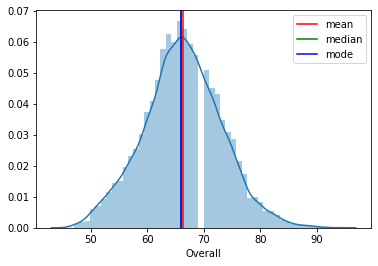

skewness is  0.06294393052137864


In [154]:
sns.distplot(df2['Overall'])# normal distribution
plt.axvline(df2['Overall'].mean(),color='r',label='mean')
plt.axvline(df2['Overall'].median(),color='g',label='median')
plt.axvline(df2['Overall'].mode()[0],color='b',label='mode')
plt.legend()
plt.show()
print('skewness is ',df2['Overall'].skew())


# Q2)
Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

/Users/adi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


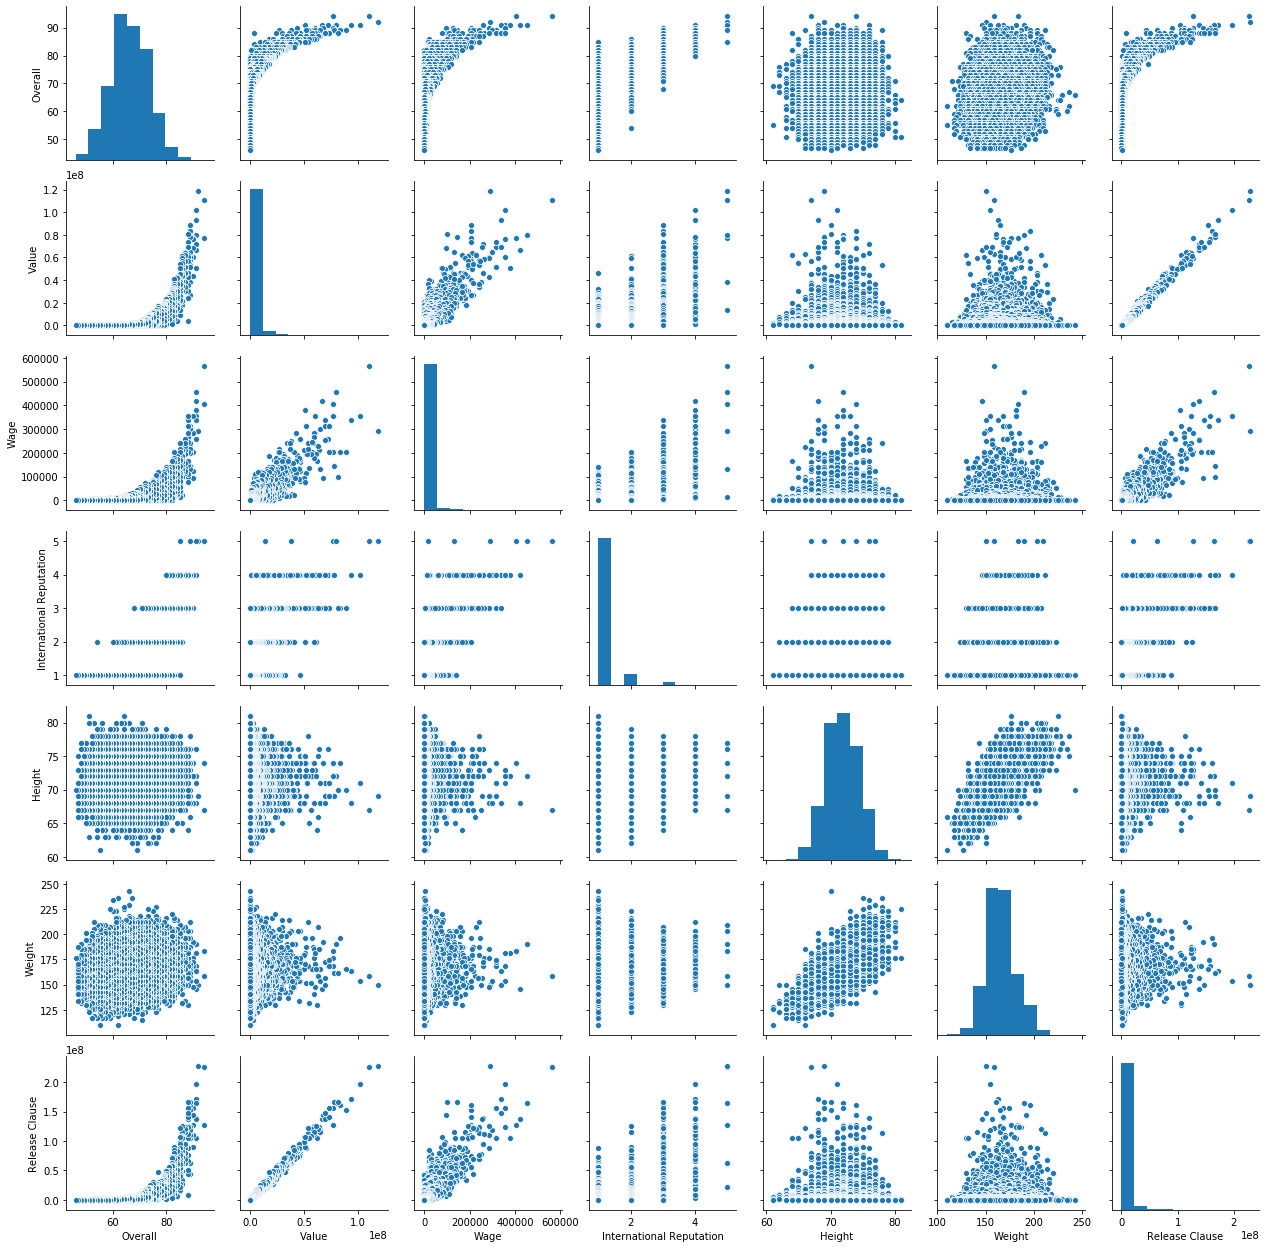

In [155]:
sns.pairplot(df2[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])

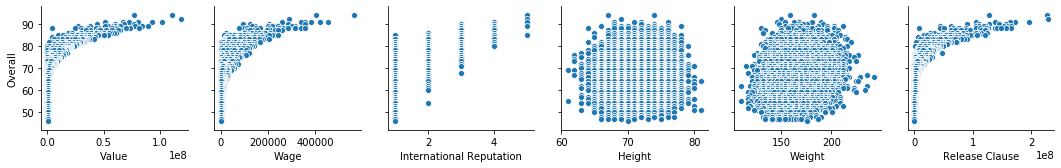

In [156]:
sns.pairplot(data=df2,x_vars=['Value','Wage','International Reputation','Height','Weight','Release Clause'],y_vars=['Overall'])

* here we have plotted overall in the y axis and the other columns in the x axis to see a relation
* we can see that value increases when you have a higher overall
* Height and weight have nothing to do with your overall rating
* higher overall rating and release clause are directly proportional

# Q3) 
Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
    a) What would the average wage for this set of players be?
    b)What is the average age?
    c)Is there a correlation between the Overall rating and Value for these players?


In [166]:
df2['Contract Valid Until'].replace('No Contract','2018',inplace=True)

In [167]:
df2['Contract Valid Until Year']=pd.to_datetime(df2['Contract Valid Until']).dt.year

In [168]:
df2.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2021
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2022
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2022
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2023


In [173]:
df3=df2.loc[df2['Contract Valid Until Year']==2020].sort_values(by='Overall',ascending=False).head(20)

In [174]:
df3

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2020
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2020
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2020
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,2020
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,2020
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,2020
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,2020
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0,2020
50,175943,D. Mertens,31,https://cdn.sofifa.org/players/4/19/175943.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0,2020


In [196]:
print(df3['Wage'].mean(),'is the average wage') 
print(df3['Age'].mean(),'is the average age ')# average wage

205450.0 is the average wage
30.65 is the average age 


* The Average Wage is 205450 for the twenty players whose contract ends in 2020
* The Average age is 30.65 for the twenty players whose contract ends in 2020

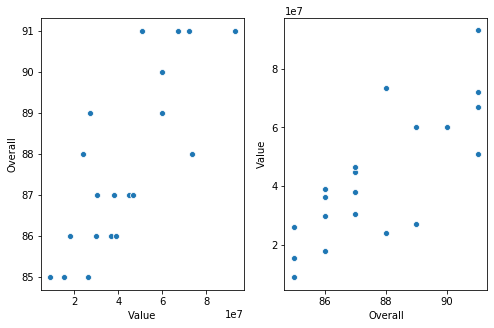

In [192]:
fig,axes=plt.subplots(1,2,figsize=(8,5))
sns.scatterplot(x=df3['Value'],y=df3['Overall'],ax=axes[0])
sns.scatterplot(x=df3['Overall'],y=df3['Value'],ax=axes[1])

In [194]:
df3[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


* From the two plots as well as the correlation table, we can see that there is a strong correlation between    Overall and Value
* Correlation of 0.7867 is high and shows that they are directly proportional
* When Overall is high, the value of the player is also most likely high.

# Q4)
a) Generate tables containing the top 5 players by Overall rating for each unique position.
b) Are there any players appearing in more than one Table. Please point out such players.
c) What is the average wage one can expect to pay for the top 5 in every position?


In [234]:
df2['Rank_Overall_Position']=df2.groupby(by='Position')['Overall'].rank(method='first',ascending=False)

In [235]:
df4=df2.loc[(df2['Rank_Overall_Position']==1)|(df2['Rank_Overall_Position']==2)|(df2['Rank_Overall_Position']==3)|(df2['Rank_Overall_Position']==4)|(df2['Rank_Overall_Position']==5),:]
df4

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year,Rank_Overall_Position
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2021,1.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2022,1.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2022,1.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020,1.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2023,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,No Club,https://cdn.sofifa.org/flags/53.png,...,70.0,70.0,16.0,8.0,11.0,12.0,13.0,NaN,2018,1.0
6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,No Club,https://cdn.sofifa.org/flags/53.png,...,34.0,33.0,16.0,13.0,15.0,16.0,8.0,NaN,2018,2.0
7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,No Club,https://cdn.sofifa.org/flags/53.png,...,71.0,64.0,11.0,7.0,8.0,12.0,12.0,NaN,2018,3.0
9905,226044,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,https://cdn.sofifa.org/flags/53.png,66,69,No Club,https://cdn.sofifa.org/flags/53.png,...,24.0,23.0,13.0,11.0,11.0,7.0,9.0,NaN,2018,4.0


In [236]:
df4['Position'].value_counts()

LF     5
RF     5
LB     5
LCM    5
LDM    5
ST     5
RS     5
LS     5
RWB    5
RW     5
RAM    5
LW     5
CDM    5
LAM    5
CM     5
CB     5
CF     5
RM     5
LCB    5
CAM    5
LM     5
GK     5
RCM    5
RDM    5
RB     5
RCB    5
LWB    5
Name: Position, dtype: int64

In [237]:
df4.dropna(inplace=True)
df4

/Users/adi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Contract Valid Until Year,Rank_Overall_Position
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2021,1.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2022,1.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2022,1.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020,1.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2023,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,201313,C. Ciano,28,https://cdn.sofifa.org/players/4/19/201313.png,Italy,https://cdn.sofifa.org/flags/27.png,75,75,Frosinone,https://cdn.sofifa.org/teams/2/light/111657.png,...,23.0,20.0,9.0,12.0,9.0,9.0,7.0,11700000.0,2021,5.0
2242,230483,Jacson Zonta,34,https://cdn.sofifa.org/players/4/19/230483.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Vitória,https://cdn.sofifa.org/teams/2/light/1719.png,...,21.0,22.0,8.0,14.0,9.0,9.0,12.0,5400000.0,2021,4.0
2247,230487,Leo Caldeirinha,34,https://cdn.sofifa.org/players/4/19/230487.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Vitória,https://cdn.sofifa.org/teams/2/light/1719.png,...,24.0,22.0,18.0,16.0,13.0,15.0,15.0,5400000.0,2021,4.0
2322,230267,Sebas Couteira,30,https://cdn.sofifa.org/players/4/19/230267.png,Brazil,https://cdn.sofifa.org/flags/54.png,74,74,Atlético Paranaense,https://cdn.sofifa.org/teams/2/light/1039.png,...,52.0,41.0,15.0,13.0,12.0,10.0,9.0,10500000.0,2021,5.0


In [249]:
df4.groupby(by='Position')['Wage'].mean()  #avg wage for each postion

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     23250.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM     99500.0
LF     121200.0
LM     164600.0
LS     101500.0
LW     261000.0
LWB     32000.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     153250.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64

In [251]:
df4['Wage'].mean() #avg wage of the top 5 of all positions

149869.23076923078

* No players are repeating in different tables as all are assigned only 1 position
* avg wage for each position and avg wage of all the top 5's in each position are shown above

# THE END